# Explore HSV Color Space

In [203]:
import numpy as np
import matplotlib.image as mpg
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Image shape: (533, 640, 3)
Image datatype: uint8
Image min intensity: 0
Image max intensity: 255


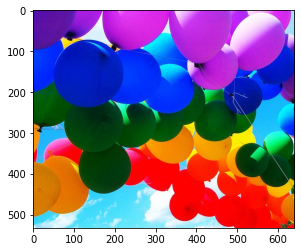

In [204]:
# Import the image and display
balloons_rgb: np.ndarray = mpg.imread('.\included_images\\balloons1.jpg')
print(f'Image shape: {balloons_rgb.shape}')
print(f'Image datatype: {balloons_rgb.dtype}')
print(f'Image min intensity: {np.amin(balloons_rgb)}')
print(f'Image max intensity: {np.amax(balloons_rgb)}')
plt.imshow(balloons_rgb)

Text(0.5, 1.0, 'Blue')

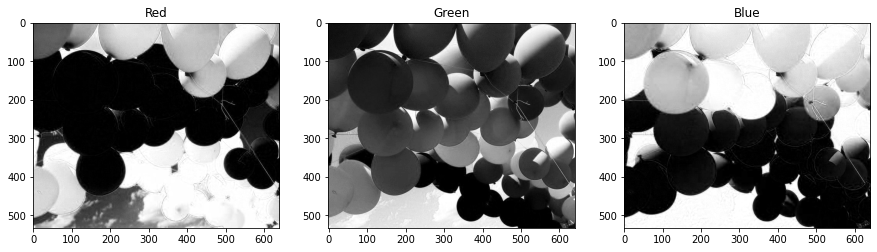

In [205]:
# Separate the color channels and display
r: np.ndarray = balloons_rgb[:, :, 0]
g: np.ndarray = balloons_rgb[:, :, 1]
b: np.ndarray = balloons_rgb[:, :, 2]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(r, cmap='gray')
ax1.set_title('Red')
ax2.imshow(g, cmap='gray')
ax2.set_title('Green')
ax3.imshow(b, cmap='gray')
ax3.set_title('Blue')

Let's pay close attention to the <strong>blue balloons</strong> in the <strong>blue color channel plot </strong>. It clearly shows different brightnesses for blue color balloons under differing light conditions. This is the problem we want to note. And let's see now, what happens when we try to separate the blue balloons in RGB color space.

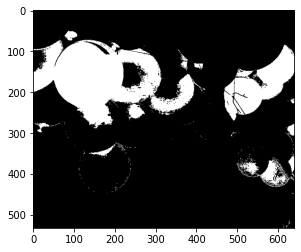

In [206]:
lower_bound: np.ndarray = np.array([0, 0, 0])
upper_bound: np.ndarray = np.array([60, 50, 255])
mask: np.ndarray = cv2.inRange(balloons_rgb, lowerb=lower_bound, upperb=upper_bound)
plt.imshow(mask, cmap='gray')

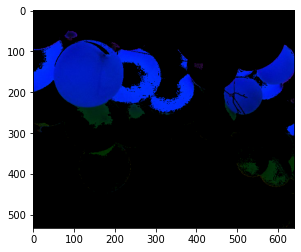

In [207]:
masked_balloons: np.ndarray = balloons_rgb.copy()
masked_balloons[mask == 0] = [0, 0, 0]
plt.imshow(masked_balloons)

As we see here, we had to quite a lot of fine adjustments to the upper and lower bound but we sill could not isolate the blue balloons reasonably. Let's now explore the HSV color space.

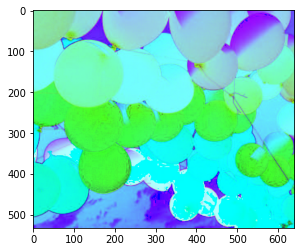

In [208]:
# Convert image from RGB to HSV space and display
balloons_hsv: np.ndarray = cv2.cvtColor(balloons_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(balloons_hsv)

Text(0.5, 1.0, 'Values')

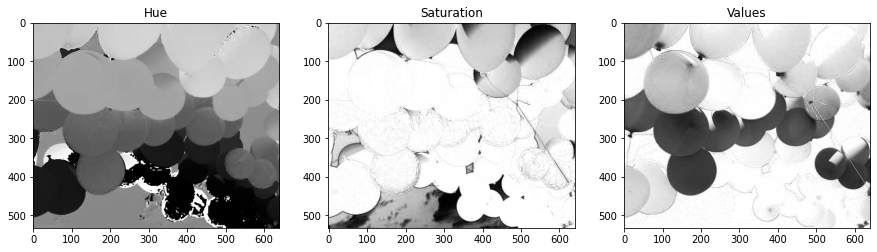

In [209]:
# Separate the hue saturation value spaces
h: np.ndarray = balloons_hsv[:, :, 0]
s: np.ndarray = balloons_hsv[:, :, 1]
v: np.ndarray = balloons_hsv[:, :, 2]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(h, cmap='gray')
ax1.set_title('Hue')
ax2.imshow(s, cmap='gray')
ax2.set_title('Saturation')
ax3.imshow(v, cmap='gray')
ax3.set_title('Values')

We again look for the <strong> blue balloons </strong> and the plots. We see, that as we have learned, the <em> value </em> channel varies the most when the color changes. In contrast, the the <em> hue </em> channel varies the least for a given color. Hue has the range from 0 to 360 in degrees and it is often represented using the color wheel. Let's create mask based on hue and see if it does a better job.

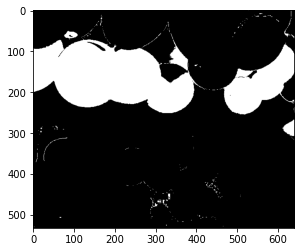

In [210]:
lower_bound: np.ndarray = np.array([110, 0, 0])
upper_bound: np.ndarray = np.array([130, 255, 255])
mask: np.ndarray = cv2.inRange(balloons_hsv, lowerb=lower_bound, upperb=upper_bound)
plt.imshow(mask, cmap='gray')


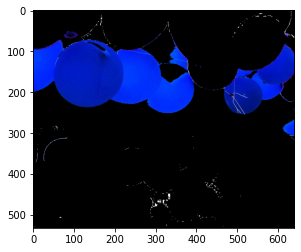

In [211]:
masked_balloons: np.ndarray = balloons_rgb.copy()
masked_balloons[mask == 0] = [0, 0, 0]
plt.imshow(masked_balloons)

As we see here, that using the HSV color space and threshold on the <em> hue </em> has yielded promising results on isolating the blue balloons. In order to understand, how Hue works let's see the min and max value of the <em> hue </em> channel.

In [212]:
print(f'Min hue value in degrees: {np.amin(h)}')
print(f'Max gue value is degrees: {np.amax(h)}')

Min hue value in degrees: 0
Max gue value is degrees: 179


On a color wheel the range of hue is [0, 360]. However OpenCV scales the values to confine them to the range [0, 180]. On a full circle color wheel blue hue represents approximately 120 degree angle. Hence, in open cv we derive it by 240 / 2 = 120. Hence we have used an approximate hue range of 110-130 to capture the blue hue in our exercise.